In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

<Figure size 640x480 with 0 Axes>

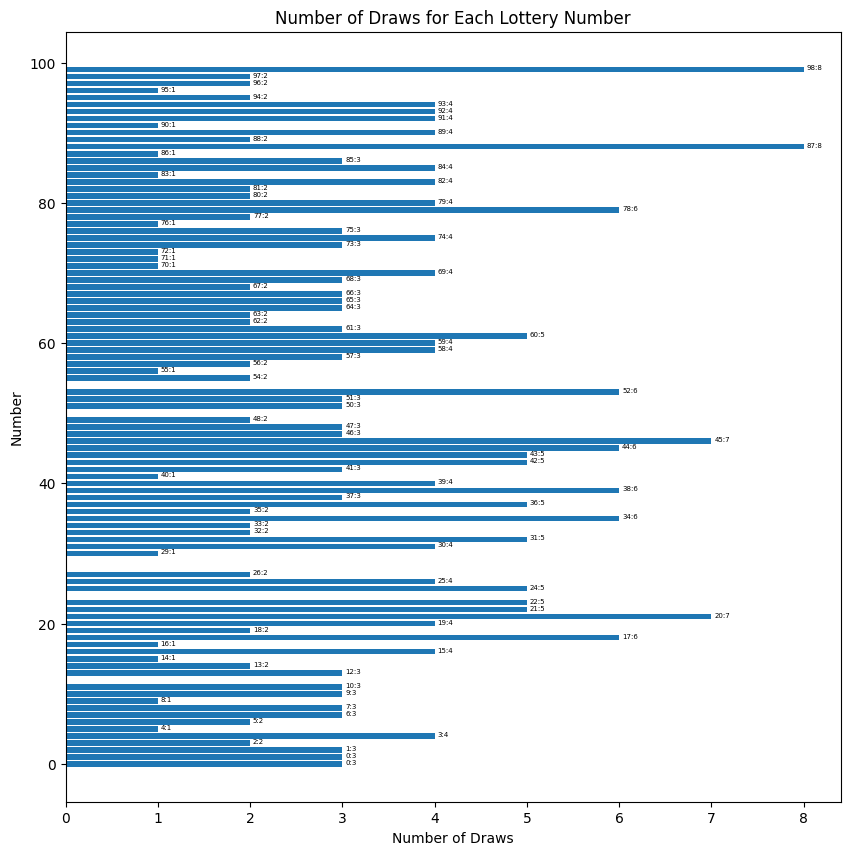

In [8]:
# ---
# Group No. 6
# 1. พิมมาดา แก้วรอด 6410450541
# 2. อภิชญา สุธีระกุล 6410450630
# 3. ภาณุพันธ์ สุวรรณชาติ 6410451806
# 4. ศุภสุตา คะเช็นแก้ว 6410451873
# ---

group = 6 #
problem = 7 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"


#แปลงข้อมูลเป็น Data Frame:ใช้pandas เพื่ออ่านข้อมูลจากไฟล์ CSV และแปลงข้อมูลเป็น Data Frame
df = pd.read_csv(data_path, header=None)
#ตรวจสอบการถูกรางวัล: ในข้อมูลเลขท้ายสองตัวของสลากกินแบ่งรัฐบาล ตรวจสอบว่าเลข 00 ถึง 99 ถูกรางวัลเลขท้ายสองตัวโดยการนับจำนวนครั้งที่แต่ละเลขถูกรางวัล.
def process_lottery_data(data_path):
    dates = df.iloc[::2, 0].reset_index(drop=True)
    draw_numbers = df.iloc[1::2, 0].reset_index(drop=True)
    processed_df = pd.DataFrame({
        'Date': pd.to_datetime(dates),
        'Draw Number': draw_numbers.astype(int)
    })
    return processed_df

# Analyze and visualize the data
def analyze_draw_numbers(processed_df, result_path, png_path):
    draw_counts = processed_df['Draw Number'].value_counts().sort_index().reset_index()
    draw_counts.columns = ['Number', 'DrawCount']

#สร้างแผนภูมิแท่งแนวนอน
    plt.figure(figsize=(10, 10))
    draw_bars = plt.barh(draw_counts['Number'], draw_counts['DrawCount'])
    plt.xlabel('Number of Draws')
    plt.ylabel('Number')
    plt.title('Number of Draws for Each Lottery Number')

# เพิ่มป้ายกำกับบนแท่ง
    for bar in draw_bars:
        width = bar.get_width()
        height = bar.get_y()
        label_x_pos = width + 0.03
        label_y_pos = (bar.get_y() + bar.get_height() / 2) - 0.05
        label_text = f'{int(height)}:{int(width)}'
        plt.text(label_x_pos, label_y_pos, label_text, fontsize=5)

# เซฟผลลัพธ์
    draw_counts.to_csv(result_path, index=False)

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()

#เรียกฟังก์ชัน process_lottery_data()
processed_df = process_lottery_data(data_path)

#เรียกฟังก์ชัน analyze_draw_numbers()
analyze_draw_numbers(processed_df, result_path, png_path)